In [36]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense
from sklearn.model_selection import TimeSeriesSplit
from keras.models import Sequential
from keras.utils import plot_model


In [37]:
df=pd.read_csv("MSFT.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

C:\Users\PRAJAKTA\AppData\Local\Temp\ipykernel_105816\1641515510.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df=pd.read_csv("MSFT.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)


In [38]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


In [39]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-18,295.369995,301.000000,292.730011,300.429993,300.429993,43317000
2022-03-21,298.890015,300.140015,294.899994,299.160004,299.160004,28351200
2022-03-22,299.799988,305.000000,298.769989,304.059998,304.059998,27599700
2022-03-23,300.510010,303.230011,297.720001,299.489990,299.489990,25715400
2022-03-24,299.140015,304.200012,298.320007,304.100006,304.100006,24446900


In [40]:
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (9083, 6)
Null Value Present:  False


<Axes: xlabel='Date'>

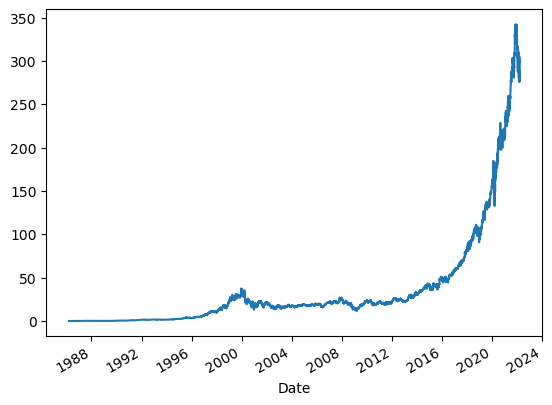

In [41]:
df['Adj Close'].plot()

In [42]:
output_var = pd.DataFrame(df['Adj Close'])
features = ['Open', 'High', 'Low', 'Volume']

In [43]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)

In [44]:
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
1986-03-13,0.000000,0.000027,0.000000,1.000000
1986-03-14,0.000025,0.000030,0.000025,0.297096
1986-03-17,0.000035,0.000032,0.000036,0.127119
1986-03-18,0.000040,0.000032,0.000030,0.063588
1986-03-19,0.000033,0.000025,0.000025,0.044285


In [45]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [46]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [47]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

c:\Users\PRAJAKTA\.conda\envs\keras_env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


You must install pydot (`pip install pydot`) for `plot_model` to work.


In [48]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 27.4717
Epoch 2/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 373.8789
Epoch 3/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 290.3478
Epoch 4/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 171.2606
Epoch 5/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 97.0932
Epoch 6/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 44.2189
Epoch 7/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 15.7786
Epoch 8/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.8411
Epoch 9/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.9699
Epoch 10/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9096
Epoch 11/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.3842
Epoch 12/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.1019
Epoch 13/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9576
Epoch 14/100
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8870
Epoc

In [49]:
y_pred= lstm.predict(X_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


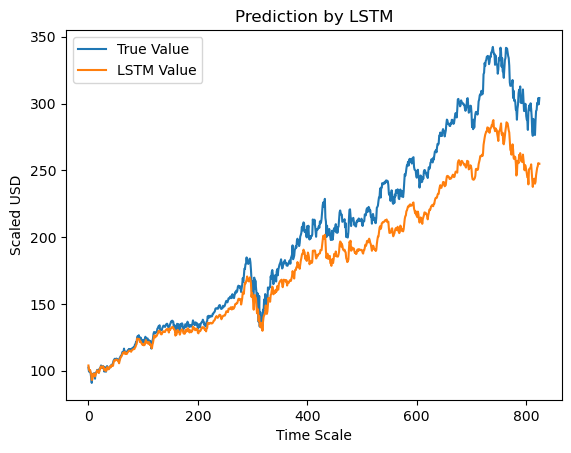

In [50]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [57]:
print("Final Stock Price Prediction:")
print(f"Actual: {y_test[-1]} Vs Predicted: {y_pred[-1]}")

Final Stock Price Prediction:
Actual: 304.100006 Vs Predicted: [254.89963]
